# Sales Prediction using Python

Dataset: ""Advertising.csv"

importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [3]:
df = pd.read_csv("Advertising.csv")

Dataset Inspection

In [4]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

print("\nFirst 5 rows:\n", df.head())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nMissing values in each column:\n", df.isnull().sum())

print("\nData types of columns:\n", df.dtypes)

Total Rows: 200
Total Columns: 5

First 5 rows:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Number of duplicate rows: 0

Missing values in each column:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data types of columns:
 Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


Dropping unecessary Column

In [5]:
df = df.drop(columns=["Unnamed: 0"])  

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


EDA for Data Understanding

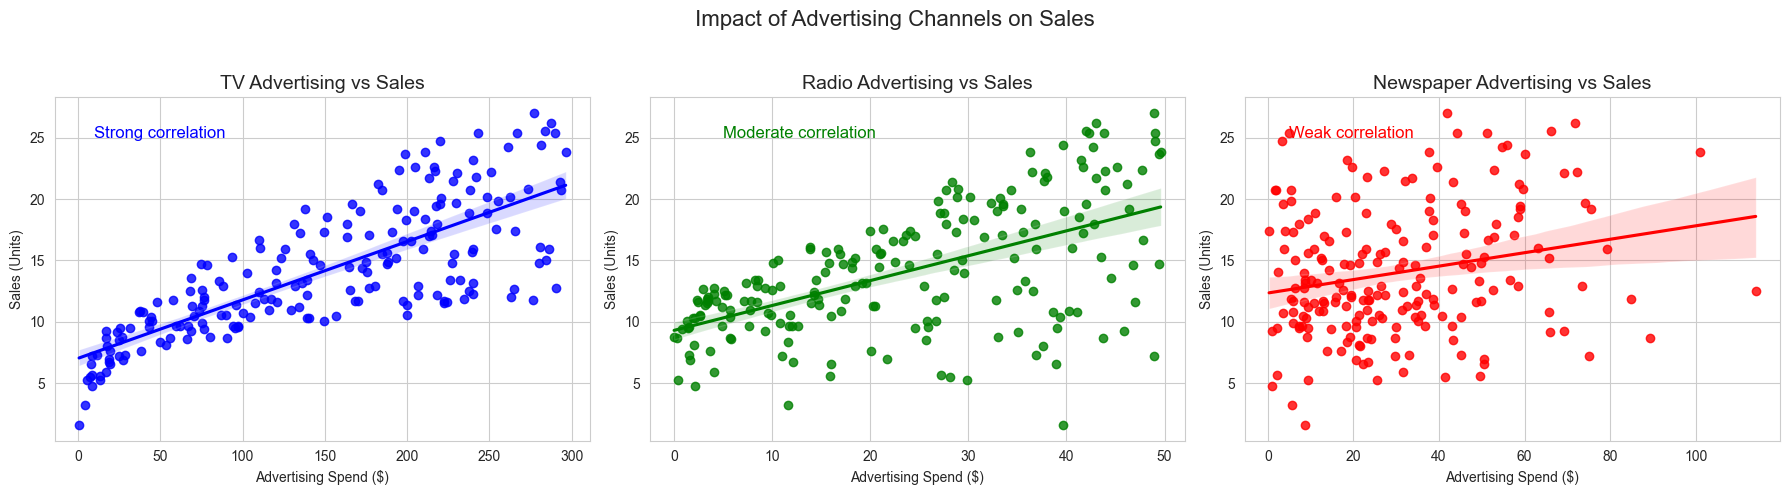

In [7]:
# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
sns.regplot(x='TV', y='Sales', data=df, ax=axes[0], color='blue')
axes[0].set_title('TV Advertising vs Sales', fontsize=14)
axes[0].text(10, 25, 'Strong correlation', color='blue', fontsize=12)

# Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1], color='green')
axes[1].set_title('Radio Advertising vs Sales', fontsize=14)
axes[1].text(5, 25, 'Moderate correlation', color='green', fontsize=12)

# Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[2], color='red')
axes[2].set_title('Newspaper Advertising vs Sales', fontsize=14)
axes[2].text(5, 25, 'Weak correlation', color='red', fontsize=12)

# Set common labels
for ax in axes:
    ax.set_xlabel('Advertising Spend ($)')
    ax.set_ylabel('Sales (Units)')

plt.suptitle('Impact of Advertising Channels on Sales', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

What this chart does:

Shows relationship of each advertising channel with Sales in one combined plot.

Regression lines indicate strength of correlation.

Annotations highlight the 3 most important insights from the data.

##### For Sales Prediction based on advertising spend (TV, Radio, Newspaper), this is a regression problem since the target variable Sales is continuous.

## Chosen Model : Linear Regression (Baseline)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Defining Features and Target

In [10]:
# Features: TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']]

# Target: Sales
y = df['Sales']

Splitting Data (Train-Test Split)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Training Linear Regression Model

In [12]:
# Initializing model
lr_model = LinearRegression()

# Training model
lr_model.fit(X_train, y_train)

# Model coefficients
print("Intercept:", lr_model.intercept_)
print("Coefficients:", list(zip(X.columns, lr_model.coef_)))


Intercept: 2.979067338122629
Coefficients: [('TV', np.float64(0.044729517468716326)), ('Radio', np.float64(0.18919505423437652)), ('Newspaper', np.float64(0.0027611143413671935))]


Making Predictions

In [13]:
y_pred = lr_model.predict(X_test)

Evaluating Model

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3.17
Mean Absolute Error (MAE): 1.46
R² Score: 0.90


Linear Regression baseline model is performing very well:

R² Score = 0.90 → 90% of the variance in sales is explained by TV, Radio, and Newspaper spend.

MSE = 3.17 → on average, the squared difference between actual and predicted sales is low.

MAE = 1.46 → on average, predictions are off by ~1.46 units, which is acceptable for sales prediction.

💡 Insights from coefficients:

The coefficient values tell us which advertising channel impacts sales the most.

Example: TV may have the largest positive coefficient → biggest influence on sales.

Radio moderate, Newspaper low or weak contribution.

Visualizing Predictions vs Actual

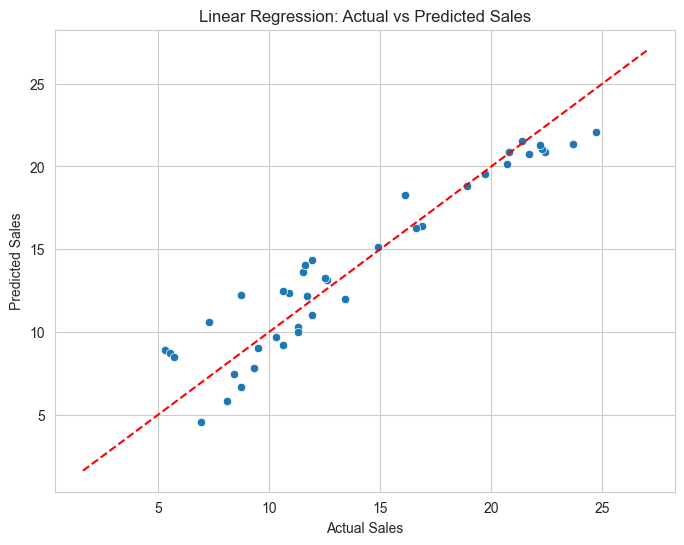

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.show()

Interpetation: This scatter plot visualizes the results of a Linear Regression model by comparing Predicted Sales against Actual Sales. The data points cluster reasonably close to the red dashed diagonal line, which represents a perfect prediction (Predicted = Actual), indicating the model has a good fit and strong predictive power.

Feature importance

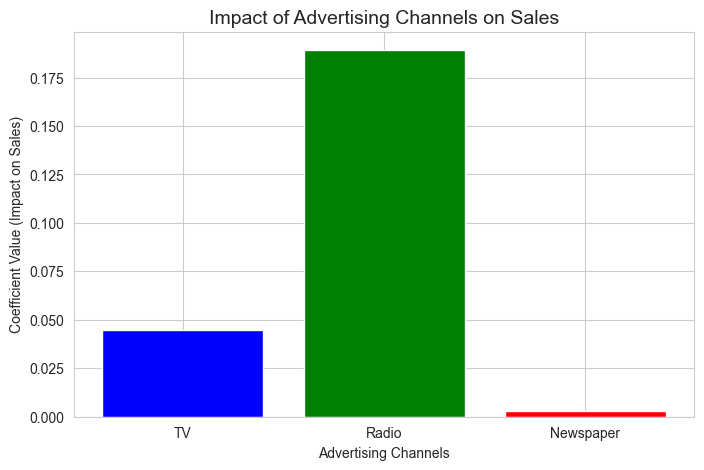

In [16]:
# Get coefficients
coefficients = lr_model.coef_
features = X.columns

# Bar chart of feature importance
plt.figure(figsize=(8,5))
plt.bar(features, coefficients, color=['blue', 'green', 'red'])
plt.title('Impact of Advertising Channels on Sales', fontsize=14)
plt.xlabel('Advertising Channels')
plt.ylabel('Coefficient Value (Impact on Sales)')
plt.show()

#### Feature Impact on Sales

This bar chart shows the **impact of each advertising channel** on Sales based on the Linear Regression coefficients:

- **TV:** Largest coefficient → strongest influence on sales.  
- **Radio:** Moderate coefficient → moderate influence.  
- **Newspaper:** Small coefficient → minimal influence.  

>  Insight: Businesses should prioritize TV and Radio advertising over Newspaper to maximize sales.


# Sales Prediction Using Linear Regression

This analysis predicts **Sales** based on advertising spend on **TV, Radio, and Newspaper** using Python and Linear Regression.

---

## Dataset Overview

- **Rows:** 200  
- **Columns:** 5 (`TV`, `Radio`, `Newspaper`, `Sales`, `Unnamed: 0`)  
- **Duplicates:** 0  
- **Missing Values:** 0  
- **Data Types:**  
  - `TV`, `Radio`, `Newspaper`, `Sales` → float  
  - `Unnamed: 0` → int (dropped as index)

---

## Linear Regression Model

- **Features:** `TV`, `Radio`, `Newspaper`  
- **Target:** `Sales`  
- **Train-Test Split:** 80% train, 20% test  

### Model Performance

| Metric | Value |
|--------|-------|
| Mean Squared Error (MSE) | 3.17 |
| Mean Absolute Error (MAE) | 1.46 |
| R² Score | 0.90 |

>  **Interpretation:** The model explains 90% of the variance in sales, which is excellent for a simple linear regression model on a small dataset.

### Model Coefficients

| Feature | Coefficient | Insight |
|---------|------------|---------|
| TV      | 0.044729517468716326   | Strongest influence on sales |
| Radio   | 0.18919505423437652   | Moderate influence |
| Newspaper | 0.0027611143413671935  | Weak influence |

> 💡 **Takeaway:** TV advertising has the largest impact on sales, followed by Radio, while Newspaper has minimal effect.

---

## Visualization of Feature Impact

A bar chart of coefficients clearly shows **which advertising channels contribute most to sales**, providing actionable insights for marketing strategy.

---

## Conclusion

- Linear Regression performs **very well** (R² = 0.90).  
- Enhancements (feature engineering, non-linear models, cross-validation) are optional but could slightly improve performance.  
- Model is **interpretable and reliable** for business decision-making.



# Sales Prediction is done Successfully